In [17]:
#%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

  
print(tf.version)
        
# Helper libraries
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#import scipy.io as sio
#from sklearn.model_selection import train_test_split
#from sklearn.utils import compute_class_weight

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
#import datetime, os

<module 'tensorflow._api.v2.version' from 'C:\\Users\\Jarrad\\anaconda3\\envs\\mlis2_cw\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>


In [18]:
batch_size = 16
img_size = [240, 320]

df = pd.read_csv(r'machine-learning-in-science-ii-2023/training_norm.csv')

print(df)


training = tf.keras.utils.image_dataset_from_directory(
    "machine-learning-in-science-ii-2023/training_data/training_data",
    image_size=img_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
    shuffle=True,
    seed=1,
)

validation = tf.keras.preprocessing.image_dataset_from_directory(
    "machine-learning-in-science-ii-2023/training_data/training_data",
    image_size=img_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    shuffle=True,
    seed=1,
)

testing = tf.keras.preprocessing.image_dataset_from_directory(
    "machine-learning-in-science-ii-2023/training_data/testing_data",
    image_size=img_size,
    batch_size=batch_size,
)


datagen = ImageDataGenerator(
    zoom_range=0.2,
    height_shift_range=0.2,
    width_shift_range=0.2,
    shear_range=0.2,
    fill_mode='nearest')



       image_id   angle  speed
0             1  0.4375    0.0
1             2  0.8125    1.0
2             3  0.4375    1.0
3             4  0.6250    1.0
4             5  0.5000    0.0
...         ...     ...    ...
13788     13794  0.6250    1.0
13789     13795  0.4375    1.0
13790     13796  0.5625    0.0
13791     13797  0.6250    0.0
13792     13798  0.6875    1.0

[13793 rows x 3 columns]
Found 0 files belonging to 0 classes.
Using 0 files for training.


ValueError: No images found.

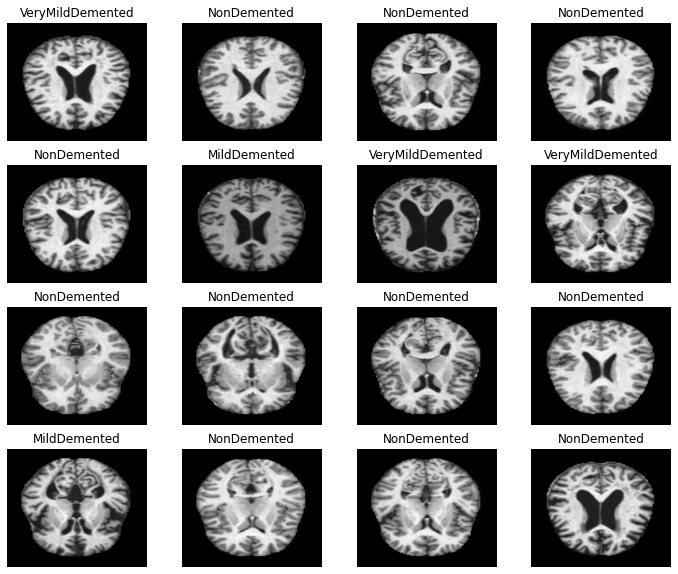

In [4]:
plt.figure(figsize=(12, 10))
for images, labels in training.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(training.class_names[labels[i]])
        plt.axis("off")

In [5]:
shape = (*img_size, 3) # inherited image size with 3 color filters

# CNN base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=shape))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
        
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.2))
model.add(layers.Flatten()),

model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.7))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(32, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))

# Output layer
model.add(layers.Flatten())
model.add(layers.Dense(2, activation='softmax'))


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 174, 206, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 87, 103, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 101, 16)       4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 48, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 38, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 23, 32)        0

In [39]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
NUM_CLASSES = len(class_names)

def one_hot_label(image, label):
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

training = training.map(one_hot_label, num_parallel_calls=AUTOTUNE)
training = training.cache().prefetch(buffer_size=AUTOTUNE)

validation = validation.map(one_hot_label, num_parallel_calls=AUTOTUNE)
validation = validation.cache().prefetch(buffer_size=AUTOTUNE)

testing = testing.map(one_hot_label, num_parallel_calls=AUTOTUNE)
testing = testing.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
model.compile(
    optimizer='adam',
    loss=tf.losses.mean_squared_error(),
    metrics=['mean_squared_error']
)

history = model.fit(
    training, 
    batch_size=batch_size,
    validation_data=validation,
    epochs=40
)

Epoch 1/40
257/257 [==============================] - 16s 46ms/step - loss: 2.3195 - accuracy: 0.4361 - val_loss: 1.0507 - val_accuracy: 0.4951
Epoch 2/40
257/257 [==============================] - 7s 29ms/step - loss: 1.0699 - accuracy: 0.4846 - val_loss: 0.9928 - val_accuracy: 0.4951
Epoch 3/40
257/257 [==============================] - 7s 29ms/step - loss: 0.9924 - accuracy: 0.5139 - val_loss: 1.0413 - val_accuracy: 0.4951
Epoch 4/40
257/257 [==============================] - 8s 29ms/step - loss: 1.0311 - accuracy: 0.4945 - val_loss: 0.9189 - val_accuracy: 0.5078
Epoch 5/40
257/257 [==============================] - 8s 30ms/step - loss: 0.9725 - accuracy: 0.5214 - val_loss: 1.0525 - val_accuracy: 0.4951
Epoch 6/40
257/257 [==============================] - 7s 29ms/step - loss: 0.9718 - accuracy: 0.5218 - val_loss: 0.9824 - val_accuracy: 0.4951
Epoch 7/40
257/257 [==============================] - 7s 29ms/step - loss: 0.9971 - accuracy: 0.4997 - val_loss: 0.8861 - val_accuracy: 0.578

In [5]:
test_loss, test_acc = model.evaluate(
    testing,
    verbose=1
)

80/80 [==============================] - 4s 32ms/step - loss: 1.2952 - accuracy: 0.6904 0s - loss: 1.3117 - ac


In [46]:
from sklearn.metrics import classification_report

model = tf.keras.models.load_model('secondModel.h5')

test_loss, test_acc = model.evaluate(
    testing,
    verbose=1
)


predict_model = model.predict(testing, verbose =1)

y = np.concatenate([y for x, y in testing], axis=0)
true = np.argmax(y, axis = 1)

print(true)
predict_model = np.argmax(predict_model, axis = 1)
print(predict_model)

print(classification_report(true, predict_model, target_names=class_names))


80/80 [==============================] - 1s 16ms/step
[2 2 0 ... 1 3 2]
[2 2 0 ... 3 3 2]
                  precision    recall  f1-score   support

    MildDemented       0.62      0.36      0.45       179
ModerateDemented       0.67      0.17      0.27        12
     NonDemented       0.68      0.91      0.78       640
VeryMildDemented       0.76      0.52      0.61       448

        accuracy                           0.69      1279
       macro avg       0.68      0.49      0.53      1279
    weighted avg       0.70      0.69      0.67      1279

